# Assignment 01 -- Solutions

We are recruited to track the evolution of an infectious agent for a team of public health officials (PHOs).
To support future strategic planning the PHOs want to know the impact of intervention $X$ on increases or decreases in the incidence of this infectious agent. The PHO team collected for each county in their state whether the intervention was enacted, and whether the incidence of case counts of this infectious agent increased or decreased 60 days after the intervention was in place data.

Using R, we will assign probabiltiies to the four events in our sample space { (intervention,raise),(intervention, no raise),(no intervention, raise),(no intervention, no raise)  }

## The data
In the below cell there are a few lines of code pre-programmed.  
Please run this cell below. 

This cell will create two vectors. 

The first vector is called ``intervention_rise`` and contains one element for each county that has intervention $X$ collected by the PHO team. 
An element is the value ``1`` if there was a rise in incidence for the infectious agent and ``0`` if there was a fall in incidence. 

The second vector is called ``nointervention_rise`` and contains one element for each county that did not have intervention $X$ collected by the PHO team. An element is the value ``1`` if there was a rise in incidence for the infectious agent and ``0`` if there was a fall in incidence. 


## Please complete the following

1. Use the ``length`` function to count the number of counties where intervention $X$ took place
2. Use the ``length`` function to count the number of counties where no intervention $X$ took place
3. Use the ``sum`` function to count the number of counties that observed a rise in incidence. 
4. Use the ``sum`` function and the ``not (!)`` operator to count the number of counties that observed a fall in incidence. 
5. Use the frequentist approach to compute the probability
   - that an intervention would take place in a county
   - that a rise in incidence was observed in a county
   - of a rise in incidence given a county implemented intervention $X$
   - of a rise in incidence given a county has not implemented intervention $X$
6. Use the multiplication rule to compute the probability
   - that an intervention and rise is observed   (Hint: P(Intervention) * P(Rise|Intervention))
   - that an intervention and fall is observed
   - that no intervention and rise is observed
   - that no intervention and fall is observed
7. Compute the probability of the below events, assuming intervention and rise/fall. are independent
   - Intervention and Rise
   - Intervention and Fall
   - No Intervention and Rise  
   - No Intervention and Fall
8. Do you think intervention $X$ is effective at preventing the spread of our infectious agent?

In [1]:
#RUN THIS CODE. DO NOT WORRY WHAT IT SAYS. 
nums = runif(10^3,0,1)

intervention_rise   = c()
nointervention_rise = c()
for (i in nums){
    if (runif(1)> 0.4){
        if ( i>0.800 ){
           risefall = 1   
        } else{risefall=0}
        intervention_rise = c(intervention_rise, risefall)
    }
    else {
        if ( i>0.325 ){
           risefall = 1   
        } else{risefall=0}
        nointervention_rise = c(nointervention_rise, risefall)
    }
}

### Before working on the questions

Some general tips for approaching programming problems:

* Understand your data  
    * `intervention_rise`: A vector of zeros and ones where *each element* represents a county that received an intervention, where ones correspond to a rise in incidence and zeros correspond to no rise.  
    * `nointervention_rise`: A vector of zeros and ones where *each element* represents a county that did not receive an intervention, where ones correspond to a rise in incidence and zeros correspond to no rise.  
* Understand in ordinary terms what the question is asking you to compute (eg, I need to count the number of elements in this vector).  
* Think about the tools available to you in R and brainstorm ways to approach the problem.

**Question 1**  
1. Use the ``length`` function to count the number of counties where intervention $X$ took place  

I know from thinking about how my data is represented that `intervention_rise` has one element per county that received intervention $X$. I understand that if I were to count all these elements, I would arrive at the solution to this problem. I also know about the tool available to me in R called the `length()` function that can be used to count the number of elements in a vector.

In [2]:
length(intervention_rise)

[1] 586

**Question 2**  
2. Use the ``length`` function to count the number of counties where no intervention $X$ took place  

Same logic as above but now for the `nointervention_rise` vector.

In [4]:
length(nointervention_rise)

[1] 414

**Question 3**  
3. Use the ``sum`` function to count the number of counties that observed a rise in incidence.  

I know that every 'one' in my data reflects a county that observed a rise in incidence. So I know that counting up all the ones across both vectors will give me my answer. I know that the `sum()` function can sum up all the elements in a vector, and I know that, for binary vectors (ie, vectors having only zeros and ones as elements), the sum of all the elements is the same as counting the number of ones in the vector.

In [5]:
sum(intervention_rise) + sum(nointervention_rise)

[1] 378

**Question 4**  
4. Use the ``sum`` function and the ``not (!)`` operator to count the number of counties that observed a fall in incidence.  

I know that every 'zero' in my data reflects a county that observed a fall in incidence. I can use the same logic I used in the previous question if I convert the zeros in my data to ones and my ones to zeros. I remember from the lecture notes that `1 == TRUE` and `0 == FALSE`, and that the NOT logical operator (`!`) can convert a `TRUE` into a `FALSE` and vice versa.

In [7]:
sum(!intervention_rise) + sum(!nointervention_rise)

[1] 622

**Question 5**  
5. Use the frequentist approach to compute the probability  

I know that one way to think about frequentist probability is:  

$$
\frac{\text{Number of Things I Care About}}{\text{Total Number of Things}}
$$

Imagine a real simple scenario. There are four marbles in a bag- one of them is blue, the rest are red. What's the probability of closing your eyes, reaching in and randomly grabbing the blue marble?  

$$
P(ChooseBlue) = \frac{\text{Number of Things I Care About}}{\text{Total Number of Things}}\\
\\
P(ChooseBlue) = \frac{\text{Number of Blue Marbles}}{\text{Number of Total Marbles}}\\
\\
P(ChooseBlue) = \frac{1}{4}\\
\\
P(ChooseBlue) = 0.25
$$

- that an intervention would take place in a county  

$$
P(Intervention) = \frac{\text{Number of Counties Receiving Intervention}}{\text{Total Number of Counties}}
$$

We use the `length()` function from before:

In [9]:
number_interventions = length(intervention_rise)
total_counties = length(intervention_rise) + length(nointervention_rise)
number_interventions / total_counties

[1] 0.586

- that a rise in incidence was observed in a county

In [10]:
number_incidence = sum(intervention_rise) + sum(nointervention_rise)
number_incidence / total_counties

[1] 0.378

- of a rise in incidence given a county implemented intervention $X$

In [12]:
rise_for_interventions = sum(intervention_rise)
total_interventions = length(intervention_rise)
rise_for_interventions / total_interventions

[1] 0.1757679

- of a rise in incidence given a county has not implemented intervention $X$

In [13]:
rise_without_intervention = sum(nointervention_rise)
total_without_intervention = length(nointervention_rise)
rise_without_intervention / total_without_intervention

[1] 0.6642512

**Question 6**

6. Use the multiplication rule to compute the probability  

We use the multiplication rule to compute the probability of two events happening (ie, their intersection):  

$$
P(A \cap B) = P(A) \cdot P(B|A)
$$

We'll use the frequentist approach to compute both $P(A)$ and $P(B|A)$, and then multiply these together to find the intersection.

- that an intervention and rise is observed  

$$
P(Intervention \cap Rise) = P(Intervention) \cdot P(Rise | Intervention)
$$

In [24]:
## compute p(intervention)
total_intervention = length(intervention_rise)
total_counties = length(intervention_rise) + length(nointervention_rise)

p_intervention = total_intervention / total_counties

## compute rise | intervention
rise_for_intervention = sum(intervention_rise)
total_intervention = length(intervention_rise)

p_rise_given_intervention = rise_for_intervention / total_intervention

## compute intersection
intersection = p_intervention * p_rise_given_intervention
intersection


[1] 0.103

We can cross reference the answer above against a frequentist approach for calculating the intersection, which is the frequency of the outcome divided by the frequency of all outcomes.

In [20]:
## frequentist_approach
intersection_frequentist = sum(intervention_rise) / total_counties

intersection == intersection_frequentist

[1] TRUE

- that an intervention and fall is observed  

$$
P(Intervention \cap Fall) = P(Intervention) \cdot P(Fall | Intervention)
$$

In [21]:
p_fall_given_intervention = sum(!intervention_rise) / length(intervention_rise)
## taking P(intervention) from above
p_intervention * p_fall_given_intervention

[1] 0.483

- that no intervention and rise is observed  

$$
P(NoIntervention \cap Rise) = P(NoIntervention) \cdot P(Rise | NoIntervention)
$$

In [22]:
p_rise_given_nointervention = sum(nointervention_rise) / length(nointervention_rise)
p_nointervention = length(nointervention_rise) / (length(nointervention_rise) + length(intervention_rise))
p_rise_given_nointervention * p_nointervention

[1] 0.275

- that no intervention and fall is observed

$$
P(NoIntervention \cap Fall) = P(NoIntervention) \cdot P(Fall|NoIntervention)
$$

In [23]:
p_fall_given_nointervention = sum(!nointervention_rise) / length(nointervention_rise)
p_fall_given_nointervention * p_nointervention

[1] 0.139

**Question 7**  
7. Compute the probability of the below events, assuming intervention and rise/fall. are independent  

Computing intersection for independent events:  

$$
P(A \cap B) = P(A) \cdot P(B)
$$

- Intervention and Rise

In [26]:
total_counties = sum(length(intervention_rise), length(nointervention_rise))
p_intervention = length(intervention_rise) / total_counties
p_rise = sum(intervention_rise, nointervention_rise) / total_counties
p_rise * p_intervention

[1] 0.221508

- Intervention and Fall

In [27]:
p_fall = sum(!intervention_rise, !nointervention_rise) / total_counties
p_fall * p_intervention

[1] 0.364492

- No Intervention and Rise  

In [29]:
p_nointervention = length(nointervention_rise) / total_counties
p_nointervention * p_rise

[1] 0.156492

- No Intervention and Fall

In [31]:
p_nointervention * p_fall

[1] 0.257508

**Question 8**  
8. Do you think intervention $X$ is effective at preventing the spread of our infectious agent?

To answer this question, we should look at our responses to question 6 and not question 7. That is because question 7 assumes that intervention and levels of incidence are independent, and we know that's a not at all a sound assumption because the intervention was implemented *in order to* influence the intervention.  




|  | Rise | No Rise |
|:------|:---:|:----:|
|**Intervention** | $.10$ | $.48$|
|**No Intervention** | $.28$ | $.14$|

I wanted to show you how to visualize these results (we will explore visualization more in a future lab towards the end of the semester):

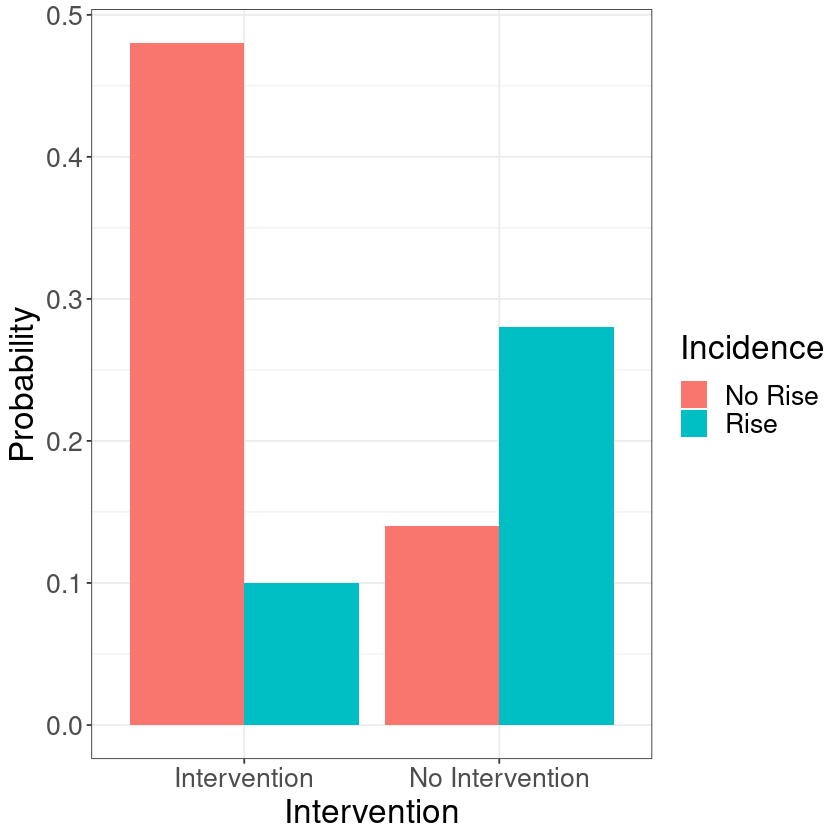

In [39]:
## dont worry about how this code works... yet
suppressMessages(library(tidyverse))
d = data.frame(Intervention = c(rep('Intervention', 2), rep('No Intervention', 2)),
              Incidence = rep(c('Rise', 'No Rise'), 2),
              values = c(.10, .48, .28, .14))
d %>%
ggplot(aes(x = Intervention, y = values)) + 
geom_bar(stat = 'identity', aes(fill = Incidence), position = position_dodge(width = .9)) + 
labs(
    y = 'Probability'
) + 
theme_bw() + 
theme(text = element_text(size = 20))

We see from this plot that Intervention $X$ was highly effective in reducing the rise of the infectious disease.